# FDS Lab S2-02: Randomness, Sampling and Simulations

Welcome to the new semester and the first lab! We hope you had a relaxing break.

**Learning outcomes:** In this lab you will learn about functions that generate random numbers, sampling, and how they can be used to run statistical simulations. By the end of this lab you should be able to:
- sample from probability distributions using numpy functions,
- sample from discrete sets of items,
- run statistical simulations to compute the distribution of a statistic,
- identify samples of convenience and problems with them, and
- code more complex statistical processes so that they can be run/sampled from.

We will go over simulations and randomness, from the topic on "Randomness, sampling and simulation".

Parts of this lab is based on Lab 5 from the Berkley Data 8 course.

**Data set information:** The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

Let us start, as usual, by importing the necessary libraries set up the imports by running the cell below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# New libraries
from scipy.stats import uniform, norm, expon

# 1. Sampling from a probability distribution

First we'll test sampling from probability distributions in python. For a uniform distribution between 0 and 1, this can be done using the `np.random.uniform` function. 

**Exercise 01:** 
- Generate 1000 samples from a uniform distribution using `np.random.uniform(size = integer)`,where you substitute `integer` with the sample size, and 
- plot a histogram of the results. 
- Create a new figure with three subplots, where you repeat this with more samples (say 100000, i.e. $10^5$) and fewer samples (say 100). What do you observe? 

*Hint: You should get something that looks like the uniform distribution in Figure 1 of the Randomness, Simulation and Sampling lecture notes.*

Text(0, 0.5, 'Frequency')

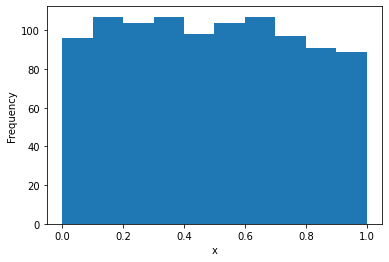

In [2]:
# Your code
x = np.random.uniform(size=1000)
plt.hist(x, 10)
plt.xlabel("x")
plt.ylabel("Frequency")

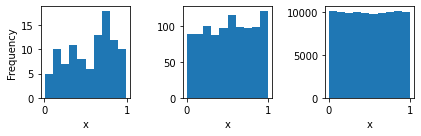

In [3]:
# Your code
x1 = np.random.uniform(size=100)
x2 = np.random.uniform(size=1000)
x3 = np.random.uniform(size=100000)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(6,2))
ax1.hist(x1, 10)
ax1.set_xlabel("x")
ax1.set_ylabel("Frequency")
ax2.hist(x2, 10)
ax2.set_xlabel("x")
ax3.hist(x3, 10)
ax3.set_xlabel("x")
plt.tight_layout()

Your answer: 
The more samples we use the more it looks like a uniform distribution.

**Exercise 02:** Repeat this exercise for  normal and exponential distributions using `np.random.normal` and `np.random.exponential`, using a 2x3 layout.

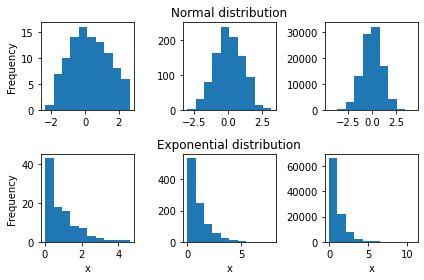

In [4]:
# Your code
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=1000)
x3 = np.random.normal(size=100000)
y1 = np.random.exponential(size=100)
y2 = np.random.exponential(size=1000)
y3 = np.random.exponential(size=100000)
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(6, 4))
ax1.hist(x1, 10)
ax1.set_ylabel("Frequency")
ax2.hist(x2, 10)
ax2.set_title("Normal distribution")
ax3.hist(x3, 10)
ax4.hist(y1, 10)
ax4.set_ylabel("Frequency")
ax4.set_xlabel("x")
ax5.hist(y2, 10)
ax5.set_title("Exponential distribution")
ax5.set_xlabel("x")
ax6.hist(y3, 10)
ax6.set_xlabel("x")
plt.tight_layout()

# 2. Sampling from a set of discrete items

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [5]:
nachos = ['cheese', 'salsa', 'both', 'neither']
np.random.choice(nachos)

'cheese'

### Sampling with replacement

To repeat this process multiple times, pass in an int `n` as the second argument to return `n` different random choices. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 3 times from the `nachos` array.

In [6]:
np.random.choice(nachos, 3)

array(['both', 'neither', 'both'], dtype='<U7')

### Sampling without replacement

Let's see what happens when we sample without replacement. Use the `replace=False` option to sample 3 items repeatedly.

In [7]:
np.random.choice(nachos, 3, replace=False)

array(['neither', 'both', 'salsa'], dtype='<U7')

This means that when we sample without replacement, each time we sample, we remove the sampled option from the set.

## 2. Statistical simulation

In the lectures, we've defined a statistical simulation as follows:

First, decide on:
- The statistic of interest (mean $\overline{X}$, standard deviation $S$, Total, etc.)
- The population distribution (e.g. normal with particular mean
  and variance) or set of discrete items
- The sample size $n$
- The number of replications $k$ 

Then simulate according to this procedure:
- For $i$ in $1,\dots, k$
  - Sample $n$ items from the population distribution or set of
    discrete items
  - Compute and store the statistic of interest for this sample
- Generate a histogram of the $k$ stored sample statistics

**Exercise 03:** Run a statistical simulation of the mean of the exponential distribution with a sample size $n=10$ and $k=10000$ replications. You should end up with a plot that looks like the bottom left plot of Figure 3 in the lecture notes on "Randomness, sampling and simulation".

(array([3.200e+01, 2.170e+02, 5.990e+02, 1.200e+03, 1.532e+03, 1.686e+03,
        1.515e+03, 1.099e+03, 8.530e+02, 5.510e+02, 3.360e+02, 1.940e+02,
        9.600e+01, 4.400e+01, 2.700e+01, 8.000e+00, 5.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.22434662, 0.35162692, 0.47890723, 0.60618754, 0.73346785,
        0.86074816, 0.98802846, 1.11530877, 1.24258908, 1.36986939,
        1.4971497 , 1.62443   , 1.75171031, 1.87899062, 2.00627093,
        2.13355124, 2.26083154, 2.38811185, 2.51539216, 2.64267247,
        2.76995278]),
 <BarContainer object of 20 artists>)

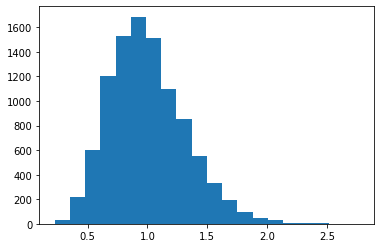

In [8]:
# Your code
k = 10000
n = 10
all_means = np.zeros(k)
for i in range(0, k):
    x = np.random.exponential(size=n)
    all_means[i] = x.mean()
    
plt.hist(all_means, 20)

## 3. Sampling Basketball Data

We will now look in more detail at sampling from an observed dataset. At the end of this section we will have coded up one repetition of a statistical simulation.

**Exercise 04:** Load the `player_data.csv` and `salary_data.cv` in the `datasets` folder as `player_data` and `salary_data`, respectively. Look at the top five entries. Then combine the data sets into one data set `full_data`. Normalize the salary column, such that the salary is stored in millions.

In [9]:
# Your code
player_data = pd.read_csv("datasets/player_data.csv")
salary_data = pd.read_csv("datasets/salary_data.csv")
player_data.head(3)

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900


In [10]:
salary_data.head(3)

,PlayerName,Salary
0,Kobe Bryant,23500000
1,Amar'e Stoudemire,23410988
2,Joe Johnson,23180790


In [11]:
full_data = pd.merge(salary_data, player_data,
                     left_on="PlayerName", right_on="Name")
full_data['Salary']=full_data['Salary']/1000000
full_data.head(3)

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,Kobe Bryant,23.500000,Kobe Bryant,36,LAL,35,199,197,47,7,128,782
1,Amar'e Stoudemire,23.410988,Amar'e Stoudemire,32,TOT,59,329,45,29,38,78,680
2,Joe Johnson,23.180790,Joe Johnson,33,BRK,80,384,292,59,14,137,1154


Rather than getting data on every player (as in the tables loaded above), imagine that we had got data on only a smaller subset of the players. For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky. 

If we want to make estimates about a certain numerical property of the population (known as a parameter, e.g. the mean or median), we may have to come up with these estimates based only on a smaller sample. Whether these estimates are useful or not often depends on how the sample was gathered. We have prepared some example sample datasets to see how they compare to the full NBA dataset. Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we recommend packaging the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

**Exercise 05:** Write a `histograms` function, which takes a data frame with columns `Age` and `Salary` and draws a histogram for each one. It should use bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

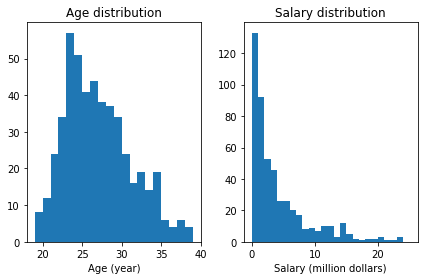

In [35]:
def histograms(df):
    # The +2 is needed to create the right number of bins
    age_bins = np.arange(min(df['Age']), max(df['Age']) + 2, 1)
    salary_bins = np.arange(min(df['Salary']), max(df['Salary']) + 2, 1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
    ax1.hist(df['Age'], bins=age_bins)
    ax1.set_xlabel('Age (year)')
    ax1.set_title('Age distribution')
    ax2.hist(df['Salary'], bins=salary_bins)
    ax2.set_xlabel('Salary (million dollars)')
    ax2.set_title('Salary distribution') 
    plt.tight_layout()
    
histograms(full_data)

**Exercise 06:** Create two functions:
1. `compute_statistics` which takes a data frame with columns `Age` and `Salary` Returns a pandas Series containing the mean age and mean salary.
2. `compute_statistics_histograms` which
- Takes a data frame with columns `Age` and `Salary` Returns a pandas Series containing the mean age and mean salary
- Draws a histogram of ages
- Draws a histogram of salaries- 

You can call the `histograms` function to draw the histograms!

0    26.536585
1     4.269776
dtype: float64

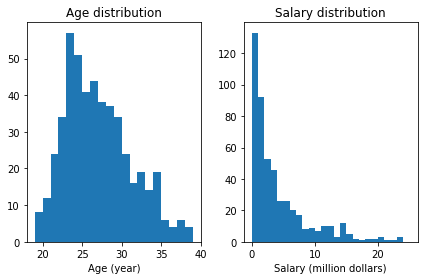

In [38]:
# Your code
def compute_statistics(df):
    return pd.Series([df['Age'].mean(),
            df['Salary'].mean()])    

def compute_statistics_histograms(df):
    histograms(df)
    return(compute_statistics(df))   

full_stats = compute_statistics_histograms(full_data)
full_stats

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Exercise 07:**  
- Create a copy of the full data frame containing only players under the age of 22 and call it `convenience_sample`.
- Use the `compute_statistics_histograms` function on the new data frame and store the results in `convenience_stats`.  

Since they're computed on a sample, these are called *sample means*. 

In [14]:
# Your code
convenience_sample = full_data[full_data['Age'] < 22]
convenience_sample

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
124,Anthony Davis,5.607240,Anthony Davis,21,NOP,68,696,149,100,200,95,1656
125,Anthony Bennett,5.563920,Anthony Bennett,21,MIN,57,216,48,27,16,36,298
126,Andrew Wiggins,5.510640,Andrew Wiggins,19,MIN,82,374,170,86,50,177,1387
141,Michael Kidd-Gilchrist,5.016960,Michael Kidd-Gilchrist,21,CHO,55,416,77,30,38,63,598
147,Jabari Parker,4.930560,Jabari Parker,19,MIL,25,138,42,31,5,47,308
155,Bradley Beal,4.505280,Bradley Beal,21,WAS,63,241,194,76,18,123,962
159,Otto Porter,4.470480,Otto Porter,21,WAS,74,221,65,44,30,52,445
170,Aaron Gordon,3.992040,Aaron Gordon,19,ORL,47,169,33,21,22,38,243
183,Alex Len,3.649920,Alex Len,21,PHO,69,454,32,34,105,74,432
184,Dante Exum,3.615000,Dante Exum,19,UTA,82,131,198,41,14,118,393


0    20.363636
1     2.383534
dtype: float64

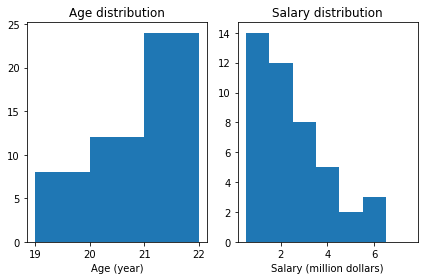

In [39]:
# Your code
convenience_stats = compute_statistics_histograms(convenience_sample)
convenience_stats

(array([8., 7., 8., 4., 5., 2., 3., 2., 2., 3.]),
 array([0.507336 , 1.0173264, 1.5273168, 2.0373072, 2.5472976, 3.057288 ,
        3.5672784, 4.0772688, 4.5872592, 5.0972496, 5.60724  ]),
 <BarContainer object of 10 artists>)

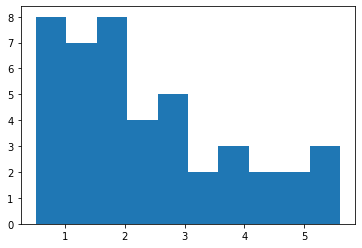

In [33]:
plt.hist(convenience_sample['Salary'])

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. 

**Exercise 08:** Plot two histograms with the same number of bins and one bin for each million salary. Plot one histogram for the full data set and one for the convenience sample.

Text(0.5, 1.0, 'Convenience sample')

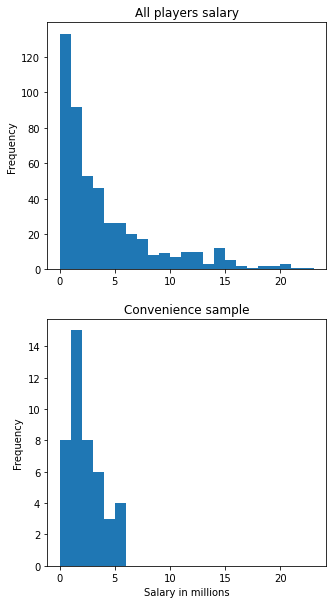

In [40]:
salary_bins = np.arange(min(full_data['Salary']), max(full_data['Salary']), 1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5, 10))
ax1.hist(full_data['Salary'], bins=salary_bins)
ax1.set_ylabel("Frequency")
ax1.set_title("All players salary")
ax2.hist(convenience_sample['Salary'], bins=salary_bins)
ax2.set_xlabel("Salary in millions")
ax2.set_ylabel("Frequency")
ax2.set_title("Convenience sample")

**Discussion:** Does the convenience sample give us an accurate picture of the salary of the full population? Discuss why it does or does not give an accurate picture? You may wish to refer to the means of the full data set and the convenience sample.

Your answer:
The convenience sample does not give us an accurate picture of the salary of the full population. Younger players tend to be paid less, so we are seeing a smaller range of salaries.

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shaking the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The data frame method `sample` produces a random sample from the data frame. By default, it draws at random **without replacement** from the rows of a table. It takes in the sample size as its argument and returns a **data frame** with only the rows that were selected.

**Careful:** The default parameter for `replace` in `pd.sample` is `replace=False`, in contrast to `np.random.choice`, where it is `replace=True`.

The optional argument `replace=True` is passed to `pd.sample()` to specify that the sample should be drawn with replacement. 

Run the cell below to see an example call to `pd.sample()` with a sample size of 5, without replacement.

In [41]:
salary_data.sample(5, replace=False)

,PlayerName,Salary
458,John Lucas III,336966
451,Larry Drew,507336
49,Nicolas Batum,11765500
182,Marreese Speights,3657500
262,Danny Granger,2077000


**Exercise 09:** This time we run the analysis on uniformly sampled sets.
- Create an empty data frame `results` with two columns `Age` and `Salary`.
- Run 100 simulations:
    - Produce a simple random sample of size 44 (10%) from `full_data`
    - Compute the statistics using your function
    - Store the results of each run in a new row of the `results` data frame

- Compute the mean and the variance of each column of the `results` data frame
- Print the results data frame
- Do the means of each simulation represent well the full data set?

In [42]:
# Your code
results = pd.DataFrame(columns=['Age', 'Salary'])
for i in range(0,100):
    subset = full_data.sample(44, replace=False)
    subset_stats = compute_statistics(subset)
    results.loc[i] = dict(Age=subset_stats[0], Salary=subset_stats[1])
print("Mean age:" + str(results.Age.mean()))
print("Mean salary:" + str(results.Salary.mean()))
print("Variance age:" + str(results.Age.var()))
print("Variance salary:" + str(results.Salary.var()))
results

Mean age:26.488863636363636
Mean salary:4.240498136136364
Variance age:0.32928974663995314
Variance salary:0.6352796541047355


,Age,Salary
0,25.431818,4.132570
1,26.500000,4.191776
2,25.954545,3.925582
3,26.318182,4.621263
4,25.954545,3.957326
...,...,...
95,27.954545,5.553385
96,25.681818,3.916002
97,26.954545,5.304746
98,25.818182,3.775462


Your answer:

By sampling randomly, the statistics are closer to the real statistics.

**Exercise 10:** Repeat exercise 08 but with a sample size of 100.
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample means and histograms closer to their true values/shape for age or for salary? How about the variance? What did you expect to see?

In [43]:
# Your code
results = pd.DataFrame(columns=['Age', 'Salary'])
for i in range(0,100):
    subset = full_data.sample(100, replace=False)
    subset_stats = compute_statistics(subset)
    results.loc[i] = dict(Age=subset_stats[0], Salary=subset_stats[1])
print("Mean age:" + str(results.Age.mean()))
print("Mean salary:" + str(results.Salary.mean()))
print("Variance age:" + str(results.Age.var()))
print("Variance salary:" + str(results.Salary.var()))
results

Mean age:26.547900000000006
Mean salary:4.2794700599
Variance age:0.16480463636363651
Variance salary:0.19970562401616979


,Age,Salary
0,26.02,3.940054
1,26.33,4.432974
2,26.07,4.932770
3,26.58,4.128105
4,26.85,4.716226
...,...,...
95,26.45,4.221762
96,26.57,4.568176
97,26.22,4.453129
98,26.44,4.820169


Your answer:
- The variance of the statistics is smaller. 
- The histograms are closer to the histograms of the full data set.

## 4. Statistical simulation of Alabama v Swain (1965)

**Exercise 11:** Use what you've learned in this lab to replicate the simulation of the Alabama v Swain (1965) case from the lecture notes. In summary:
- Use a statistical simulation to generate the distribution of the number of Black people on a jury panel of 100 that that would be chosen randomly from a population comprising 26% Black and 74% non-Black people
- Plot a histogram of the distribution and also plot the actual number observed, which was 8.

In [44]:
# Your answer
population_proportions = [.26, .74]
def panel_number_black():
    panel = np.random.choice(['Black', 'Non-Black'], 100, True, population_proportions)
    return(np.sum(panel == 'Black'))

k = 10000
panels = np.zeros(k)

for i in np.arange(k):
    panels[i] = panel_number_black()

Text(0, 0.5, 'Frequency')

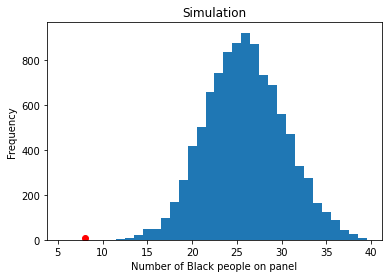

In [46]:
hist_panels = plt.hist(panels, bins=np.arange(5.5,40.))
plt.scatter(8, 10, color='red')
plt.title('Simulation')

plt.xlabel('Number of Black people on panel')
plt.ylabel('Frequency')